**Analyzing happiness levels and their correlation with various factors**
---



In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/kendrickchoong/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Parsing through US Census data and assigning to a dataframe.
df_pop = pd.read_table("idb5yr.txt", header=0, delimiter="|")
df_pop

,#YR,GEO_ID,AREA_KM2,ASFR15_19,ASFR20_24,ASFR25_29,ASFR30_34,ASFR35_39,ASFR40_44,ASFR45_49,...,DEATHS,NIM,NATINCR,MEDAGE,MEDAGE_M,MEDAGE_F,SEXRATIO,DEPND,DEPND0_14,DEPND65_
0,1950,W140000WOAD,468.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,W140000WOAD,468.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,W140000WOAD,468.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,W140000WOAD,468.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,W140000WOAD,468.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34232,2096,W140000WOZW,386847.0,17.8,64.2,102.9,101.4,51.5,12.6,3.1,...,281512.0,-62544.0,104931.0,41.5,40.6,42.4,0.963,64.4,28.2,36.2
34233,2097,W140000WOZW,386847.0,17.1,63.1,102.2,101.0,51.1,12.5,3.1,...,285449.0,-62544.0,95843.0,41.8,41.0,42.7,0.962,64.7,27.9,36.8
34234,2098,W140000WOZW,386847.0,16.4,62.1,101.5,100.7,50.8,12.3,3.0,...,289548.0,-62544.0,86529.0,42.2,41.3,43.0,0.962,65.0,27.6,37.4
34235,2099,W140000WOZW,386847.0,15.7,61.0,100.7,100.3,50.4,12.2,3.0,...,293634.0,-62544.0,77167.0,42.5,41.6,43.3,0.962,65.3,27.3,38.0


In [3]:
# Creating a new column in the dataset based off of the 'GEO_ID' column to have a 2 digit country code.
def get_code(data):
    data = data[-2:]
    return data

df_pop['Country_Code'] = df_pop['GEO_ID'].apply(get_code)

In [4]:
# Limiting the years of the census data to be 2000-2024
df_pop = df_pop.loc[(df_pop['#YR'] >= 2000) & (df_pop['#YR'] < 2024)]

In [5]:
# Reading in data from a data file countaining a key between country name and the 2 digit country code.
df_country_cd = pd.read_table("data.csv", header=0, delimiter=",")
df_country_cd

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS
...,...,...
244,Wallis and Futuna,WF
245,Western Sahara,EH
246,Yemen,YE
247,Zambia,ZM


In [6]:
# Merge the census data with the country code data to match the countries data sets together. Drop any unneeded columns.
df_final = pd.merge(df_pop,df_country_cd,how='left',left_on='Country_Code',right_on='Code', suffixes=('1', '2')).drop(['Code'], axis=1)
df_final = df_final.drop(['GEO_ID'],axis = 1)
df_final[df_final['Name'].isin(['United States'])]

,#YR,AREA_KM2,ASFR15_19,ASFR20_24,ASFR25_29,ASFR30_34,ASFR35_39,ASFR40_44,ASFR45_49,CBR,...,NATINCR,MEDAGE,MEDAGE_M,MEDAGE_F,SEXRATIO,DEPND,DEPND0_14,DEPND65_,Country_Code,Name
5016,2000,9151125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,United States
5017,2001,9151125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,United States
5018,2002,9151125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,United States
5019,2003,9151125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,United States
5020,2004,9151125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,United States
5021,2005,9151125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,United States
5022,2006,9151125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,United States
5023,2007,9151125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,United States
5024,2008,9151125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,United States
5025,2009,9151125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,United States


In [7]:
# Loading in the data from the world happiness report dataset for multiple years up to 2020.
# Dropping unnecessary columns and renaming columns to match with the other WHR datasets.
df_WHR = pd.read_table('world-happiness-report.csv', header=0, delimiter=",")
df_WHR = df_WHR.drop(['Positive affect','Negative affect'],axis=1)
df_WHR = df_WHR.rename(columns={"Life Ladder": "Ladder score", "Log GDP per capita": "Logged GDP per capita",
                       "Healthy life expectancy at birth":"Healthy life expectancy"})
df_WHR

,Country name,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776
...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831


In [8]:
# Loading in the data from the WHR dataset for 2021.
# Dropping unnecessary columns and renaming columns to match with the other WHR datasets.
df_WHR_2021 = pd.read_table('world-happiness-report-2021.csv', header=0, delimiter=",")
df_WHR_2021 = df_WHR_2021.drop(df_WHR_2021.columns[12:20], axis = 1)
df_WHR_2021 = df_WHR_2021.drop(['Regional indicator','Standard error of ladder score','upperwhisker','lowerwhisker'], axis = 1)
df_WHR_2021['year'] = 2021
df_WHR_2021

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,Finland,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,2021
1,Denmark,7.620,10.933,0.954,72.700,0.946,0.030,0.179,2021
2,Switzerland,7.571,11.117,0.942,74.400,0.919,0.025,0.292,2021
3,Iceland,7.554,10.878,0.983,73.000,0.955,0.160,0.673,2021
4,Netherlands,7.464,10.932,0.942,72.400,0.913,0.175,0.338,2021
...,...,...,...,...,...,...,...,...,...
144,Lesotho,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,2021
145,Botswana,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,2021
146,Rwanda,3.415,7.676,0.552,61.400,0.897,0.061,0.167,2021
147,Zimbabwe,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,2021


In [9]:
# Combining the two datasets by appending records.
df_WHR = pd.concat([df_WHR_2021,df_WHR])
df_WHR

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2021
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2021
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2021
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2021
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2021
...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,3.735,7.984,0.768,54.4,0.733,-0.095,0.724,2016
1945,Zimbabwe,3.638,8.016,0.754,55.0,0.753,-0.098,0.751,2017
1946,Zimbabwe,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,2018
1947,Zimbabwe,2.694,7.950,0.759,56.2,0.632,-0.064,0.831,2019


In [10]:
# Merging the WHR data with the census data on the country name and year to match all the census variables with the happiness variables.
df_final = pd.merge(df_WHR,df_final,how='inner',left_on=['Country name','year'],right_on=['Name','#YR'], suffixes=('1', '2')).drop(['Name','#YR','Country_Code'], axis=1)
df_final


,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,AREA_KM2,...,DEATHS,NIM,NATINCR,MEDAGE,MEDAGE_M,MEDAGE_F,SEXRATIO,DEPND,DEPND0_14,DEPND65_
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2021,303815.0,...,57727.0,13722.0,901.0,42.9,41.4,44.6,0.972,63.9,26.8,37.1
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2021,42434.0,...,56003.0,16140.0,9823.0,42.1,41.0,43.2,0.993,57.5,25.8,31.7
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2021,39997.0,...,71192.0,53382.0,18452.0,43.6,42.9,44.5,0.986,52.4,22.8,29.6
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2021,100250.0,...,2324.0,1094.0,2323.0,37.4,36.8,37.9,1.004,56.3,31.6,24.7
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2021,33893.0,...,170802.0,108276.0,7704.0,42.4,41.2,43.6,0.990,54.5,23.7,30.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,Zimbabwe,3.735,7.984,0.768,54.4,0.733,-0.095,0.724,2016,386847.0,...,122756.0,-7473.0,355515.0,19.9,19.1,20.7,0.935,75.1,68.4,6.7
1834,Zimbabwe,3.638,8.016,0.754,55.0,0.753,-0.098,0.751,2017,386847.0,...,121349.0,3719.0,352722.0,20.0,19.2,20.8,0.937,74.4,67.9,6.6
1835,Zimbabwe,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,2018,386847.0,...,119611.0,-17535.0,361543.0,20.2,19.4,21.0,0.939,74.0,67.4,6.6
1836,Zimbabwe,2.694,7.950,0.759,56.2,0.632,-0.064,0.831,2019,386847.0,...,118124.0,-17017.0,369282.0,20.4,19.6,21.1,0.941,73.8,67.2,6.6


In [11]:
# Creating a exported csv for reference.
df_final.to_csv('final_dataset.csv', index=False)

In [12]:
# Adding in a portion about descriptive statistics.
print(f"Number of Countries: {len(df_final['Country name'].unique())}")
print(f"Year Max: {df_final['year'].max()}")
print(f"Year Min: {df_final['year'].min()}")
df_describe = df_final.iloc[:, 1:5:1]
df_describe.describe()

Number of Countries: 145
Year Max: 2021
Year Min: 2005


,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy
count,1838.000000,1826.000000,1826.000000,1838.000000
mean,5.510536,9.400579,0.815534,63.666869
std,1.143853,1.172305,0.121628,7.558861
min,2.375000,6.635000,0.290000,32.300000
25%,4.642500,8.460500,0.750000,58.970000
50%,5.437500,9.537000,0.845000,65.500000
75%,6.376500,10.405250,0.910000,69.000000
max,8.019000,11.648000,0.987000,77.100000


Looking at the dataset, there are 122 variables, 1837 records, 145 distinct countries, and a date range of 2005-2021 eventhough records were restricted from 2000. The dataset itself was missing records from 2000-2005 so those were removed via the join statements.

Observing the descriptive statistics of the data, we see a mean happiness of 5.51 out of 10. The happiest country self reported at 8.02 while the saddest country reported happiness at 2.38.

In [13]:
df = df_final

In [14]:
mean_per_country = df.groupby('Country name').mean()
print("Mean values for each country:")
print(mean_per_country)


Mean values for each country:
              Ladder score  Logged GDP per capita  Social support  \
Country name                                                        
Afghanistan       3.512231               7.654231        0.504923   
Albania           5.026357               9.394071        0.714857   
Algeria           5.334000               9.330333        0.803375   
Angola            4.420250               8.990000        0.738250   
Argentina         6.286313              10.029312        0.904000   
...                    ...                    ...             ...   
Uruguay           6.272437               9.846562        0.903687   
Uzbekistan        5.819286               8.603214        0.927571   
Yemen             3.892692               8.055000        0.746923   
Zambia            4.519800               8.072067        0.735733   
Zimbabwe          3.836500               7.856125        0.796312   

              Healthy life expectancy  Freedom to make life choices  \
C

In [15]:
columns_to_Exclude = df.columns[1:]  # Excluding the first column

result = pd.DataFrame({
    'Mean': df[columns_to_Exclude].mean(),
    'Median': df[columns_to_Exclude].median(),
    'Standard Deviation': df[columns_to_Exclude].std()
})

print(result)

                                   Mean   Median  Standard Deviation
Ladder score                   5.510536   5.4375            1.143853
Logged GDP per capita          9.400579   9.5370            1.172305
Social support                 0.815534   0.8450            0.121628
Healthy life expectancy       63.666869  65.5000            7.558861
Freedom to make life choices   0.751295   0.7730            0.141976
...                                 ...      ...                 ...
MEDAGE_F                      30.784842  29.4000            9.620013
SEXRATIO                       1.002254   0.9760            0.198277
DEPND                         59.179771  53.6000           17.784919
DEPND0_14                     44.877535  38.7500           23.096565
DEPND65_                      14.303053  10.2000            9.407719

[121 rows x 3 columns]


In [16]:
df = df_final
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Country name                0
Ladder score                0
Logged GDP per capita      12
Social support             12
Healthy life expectancy     0
                           ..
MEDAGE_F                    4
SEXRATIO                    4
DEPND                       4
DEPND0_14                   4
DEPND65_                    4
Length: 122, dtype: int64


In [17]:
df.fillna(df[columns_to_Exclude].mean(), inplace=True)
print("\nData after missing values imputation:")
print(df.head())

df.to_csv('final_dataset_imputed.csv', index=False)


Data after missing values imputation:
  Country name  Ladder score  Logged GDP per capita  Social support  \
0      Finland         7.842                 10.775           0.954   
1      Denmark         7.620                 10.933           0.954   
2  Switzerland         7.571                 11.117           0.942   
3      Iceland         7.554                 10.878           0.983   
4  Netherlands         7.464                 10.932           0.942   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                     72.0                         0.949      -0.098   
1                     72.7                         0.946       0.030   
2                     74.4                         0.919       0.025   
3                     73.0                         0.955       0.160   
4                     72.4                         0.913       0.175   

   Perceptions of corruption  year  AREA_KM2  ...    DEATHS       NIM  \
0                      0.186

In [18]:
df2 = pd.read_csv('final_dataset_imputed.csv')

missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
Country name               0
Ladder score               0
Logged GDP per capita      0
Social support             0
Healthy life expectancy    0
                          ..
MEDAGE_F                   0
SEXRATIO                   0
DEPND                      0
DEPND0_14                  0
DEPND65_                   0
Length: 122, dtype: int64


In [19]:
df_imputed = pd.read_csv('final_dataset_imputed.csv')

def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

outliers_dict = {}

for column in df_imputed.columns[1:]:
    outliers = detect_outliers_iqr(df_imputed[column])
    outliers_dict[column] = outliers.sum()

print("Number of outliers in each factor:")
for column, count in outliers_dict.items():
    print(f"{column}: {count}")

Number of outliers in each factor:
Ladder score: 0
Logged GDP per capita: 0
Social support: 42
Healthy life expectancy: 16
Freedom to make life choices: 14
Generosity: 37
Perceptions of corruption: 171
year: 0
AREA_KM2: 209
ASFR15_19: 60
ASFR20_24: 12
ASFR25_29: 33
ASFR30_34: 96
ASFR35_39: 72
ASFR40_44: 113
ASFR45_49: 138
CBR: 8
CDR: 23
E0: 46
E0_F: 38
E0_M: 29
FMR0_4: 118
FMR1_4: 216
FPOP: 216
FPOP0_4: 183
FPOP10_14: 182
FPOP100_: 280
FPOP15_19: 182
FPOP20_24: 188
FPOP25_29: 202
FPOP30_34: 207
FPOP35_39: 222
FPOP40_44: 253
FPOP45_49: 290
FPOP5_9: 182
FPOP50_54: 293
FPOP55_59: 298
FPOP60_64: 289
FPOP65_69: 279
FPOP70_74: 290
FPOP75_79: 277
FPOP80_84: 266
FPOP85_89: 250
FPOP90_94: 231
FPOP95_99: 254
GR: 19
GRR: 70
IMR: 57
IMR_F: 62
IMR_M: 54
MMR0_4: 99
MMR1_4: 236
MPOP: 214
MPOP0_4: 182
MPOP10_14: 182
MPOP100_: 291
MPOP15_19: 182
MPOP20_24: 188
MPOP25_29: 203
MPOP30_34: 205
MPOP35_39: 204
MPOP40_44: 243
MPOP45_49: 284
MPOP5_9: 182
MPOP50_54: 281
MPOP55_59: 270
MPOP60_64: 268
MPOP65_69: 

In [20]:
print("Original DataFrame shape:", df.shape)

Original DataFrame shape: (1838, 122)


#Statisitical test

#Multiple linear regression analysis

Multiple linear regression was chosen as statistical test for our data to analyze happiness levels and their correlation with various factors. It helps helps us understand how multiple independent variables (Logged GDP per capita, Social support, and Healthy life expectancy) collectively influence the dependent variable (Ladder score) which is the happiness measure.

In [21]:
import statsmodels.api as sm

df3 = pd.read_csv('final_dataset_imputed.csv')

X = df3[['Logged GDP per capita', 'Social support', 'Healthy life expectancy']]
y = df3['Ladder score']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1419.
Date:                Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                        11:26:47   Log-Likelihood:                -1751.5
No. Observations:                1838   AIC:                             3511.
Df Residuals:                    1834   BIC:                             3533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#Result interpretation

The multiple linear regression analysis reveals that all three factors—Logged GDP per capita, Social Support, and Healthy Life Expectancy—significantly impact the Ladder score, a measure of happiness. The coefficients indicate that higher GDP per capita (0.3693), stronger social support (2.7211), and longer healthy life expectancy (0.0383) are all associated with increased happiness levels. The p-values for all variables are less than 0.0001, confirming their high significance. The model explains approximately 69.9% of the variation in happiness levels (R-squared = 0.699), demonstrating a strong fit. This analysis underscores the critical roles of economic stability, social networks, and health in determining happiness.

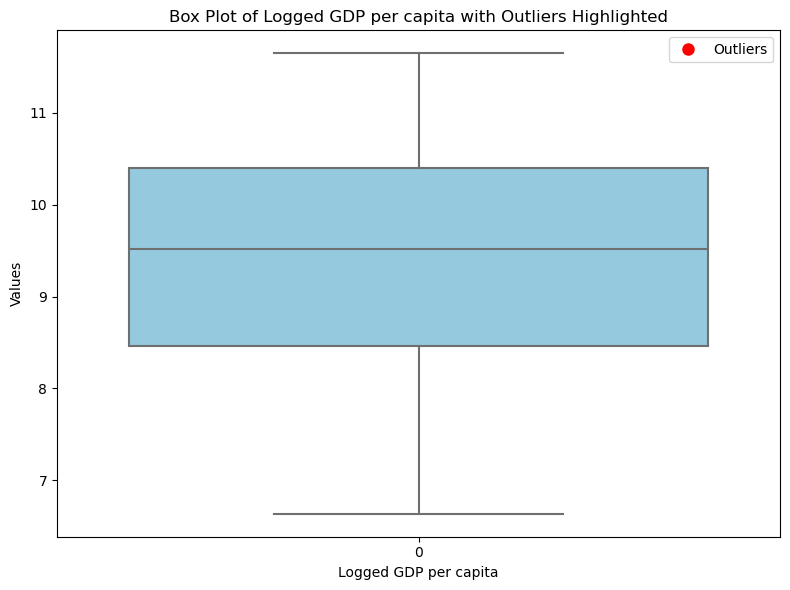

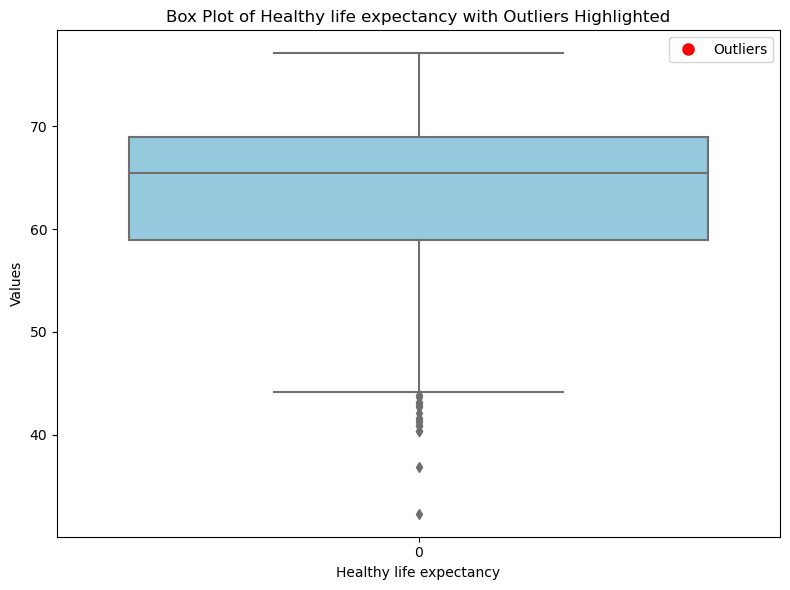

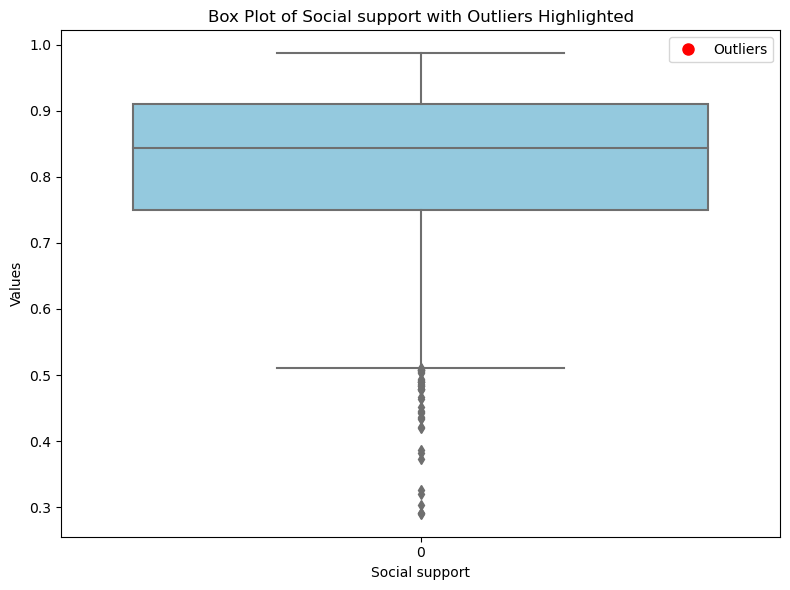

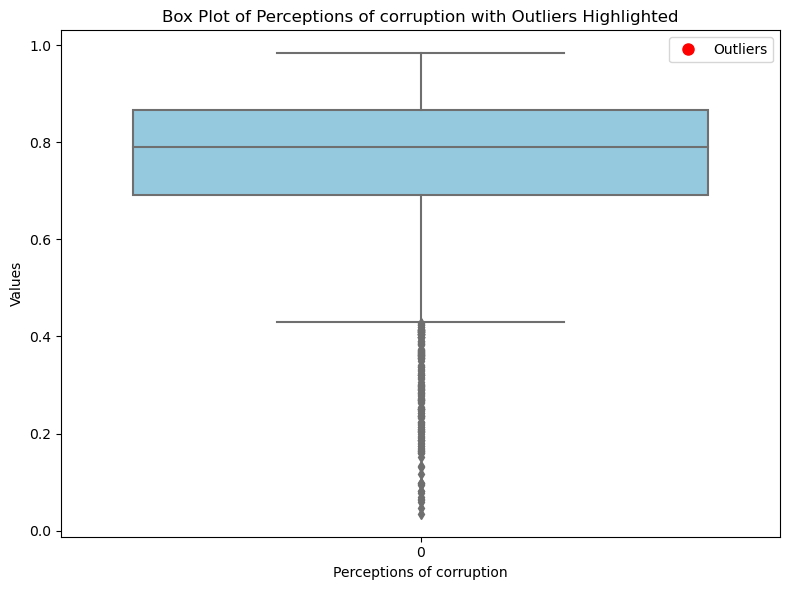

In [22]:
df = pd.read_csv('final_dataset_imputed.csv')
columns_to_display = ['Logged GDP per capita', 'Healthy life expectancy', 'Social support', 'Perceptions of corruption']
for column in columns_to_display:
    outliers = detect_outliers_iqr(df[column])

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[column], color='skyblue')
    if not outliers.empty:
        plt.plot([], [], 'o', markersize=8, label='Outliers', color='red')
    plt.legend()
    plt.title(f'Box Plot of {column} with Outliers Highlighted')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()

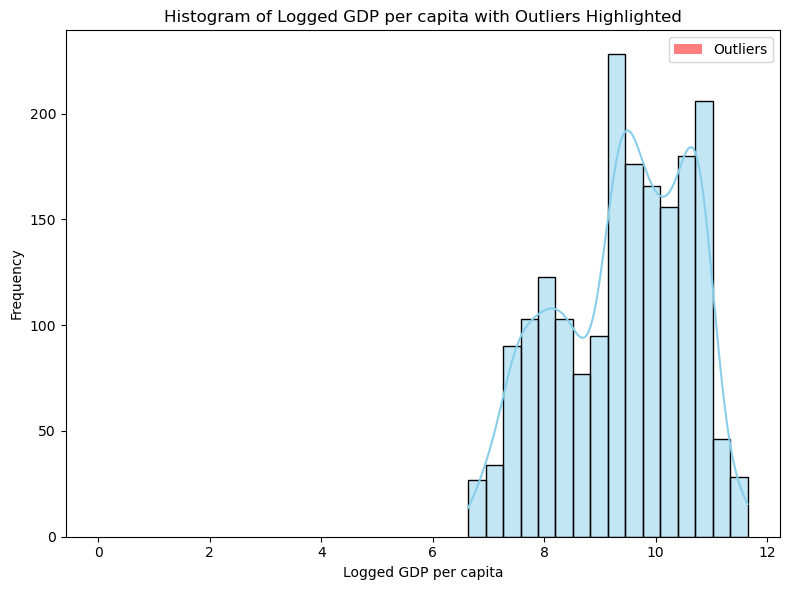

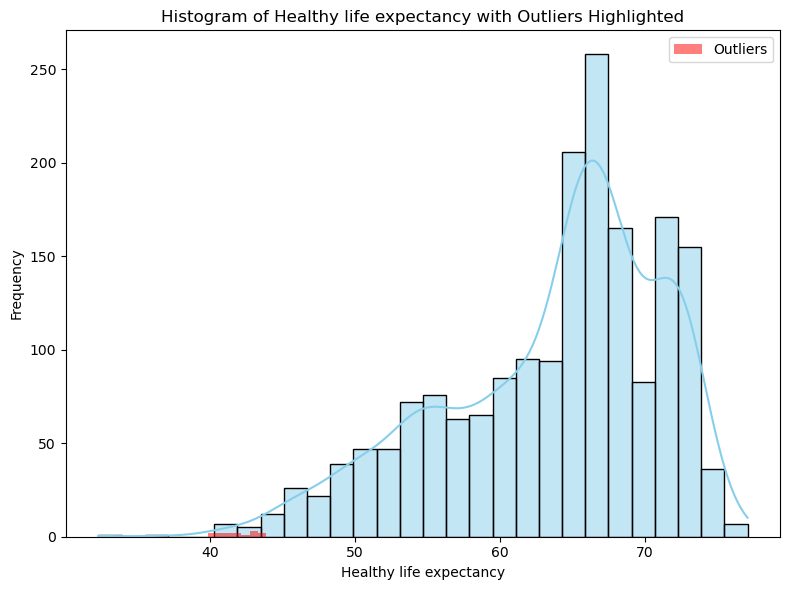

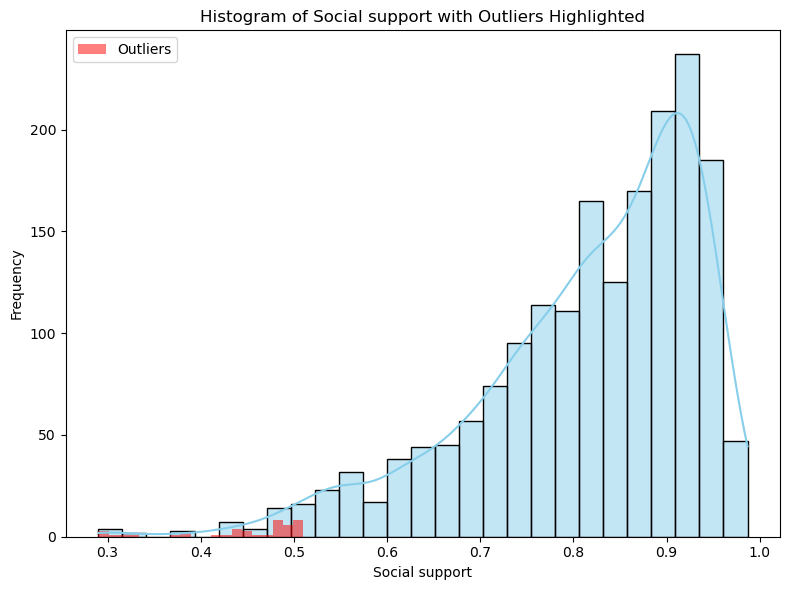

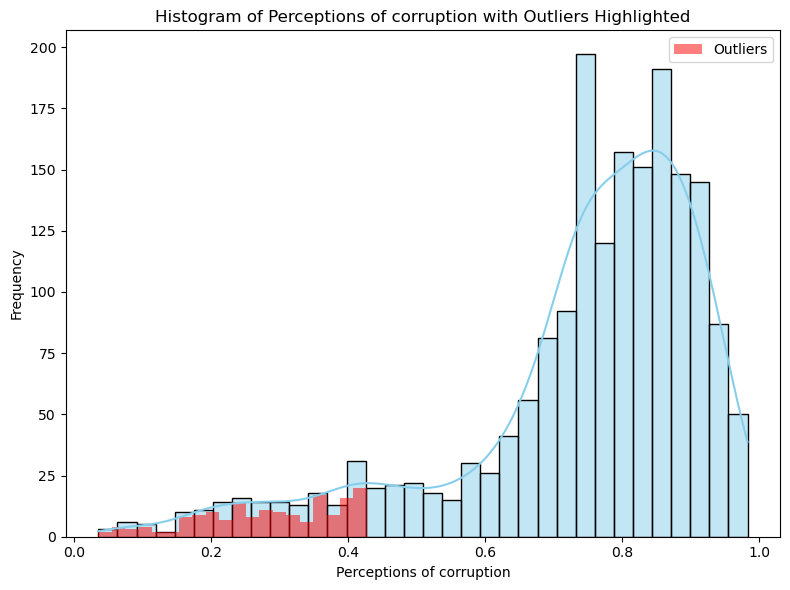

In [23]:
df = pd.read_csv('final_dataset_imputed.csv')
for column in columns_to_display:
    outliers = detect_outliers_iqr(df[column])

    plt.figure(figsize=(8, 6))
    sns.histplot(data=df[column], kde=True, color='skyblue')
    if not outliers.empty:
        plt.hist(df[column][outliers], bins=20, color='red', alpha=0.5, label='Outliers')
    plt.legend()
    plt.title(f'Histogram of {column} with Outliers Highlighted')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [24]:
df = pd.read_csv('final_dataset_imputed.csv')
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

removed_rows = 0
for column in columns_to_display:
    initial_shape = df.shape[0]
    df = remove_outliers_iqr(df, column)
    removed_rows += initial_shape - df.shape[0]


print("Shape of the data after removing outliers:", df.shape)
print("Number of removed rows:", removed_rows)

Shape of the data after removing outliers: (1614, 122)
Number of removed rows: 224


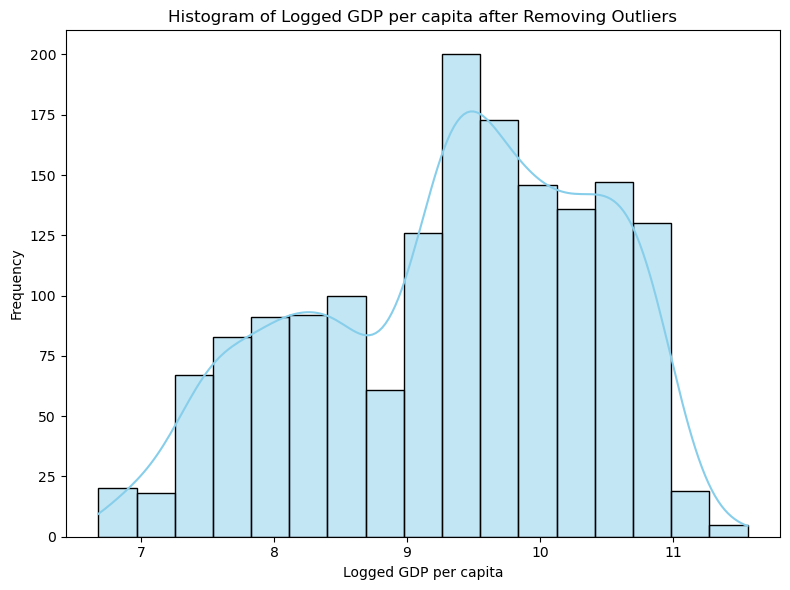

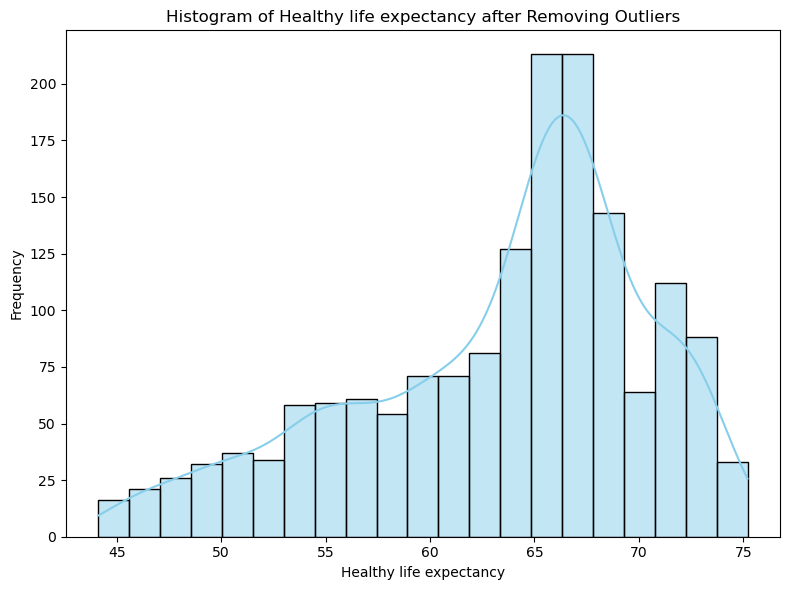

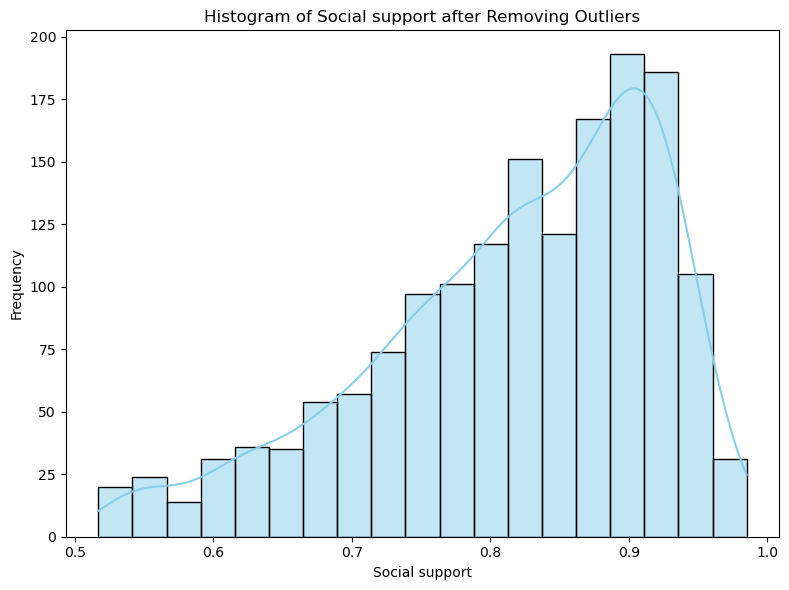

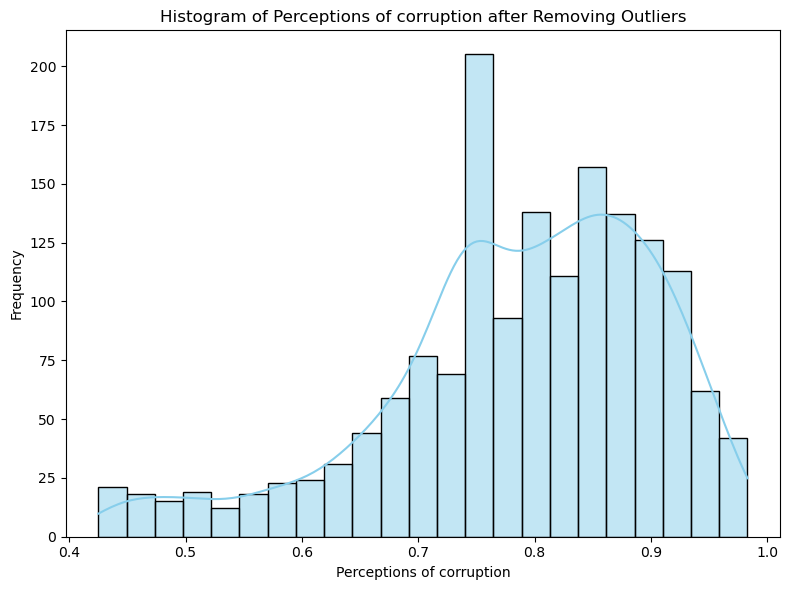

In [25]:
for column in columns_to_display:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df[column], kde=True, color='skyblue')
    plt.title(f'Histogram of {column} after Removing Outliers')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

/var/folders/1t/2zc3xggj5mq45rqj5hkc711w0000gn/T/ipykernel_5083/493437114.py:24: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


NameError: name 'merge' is not defined

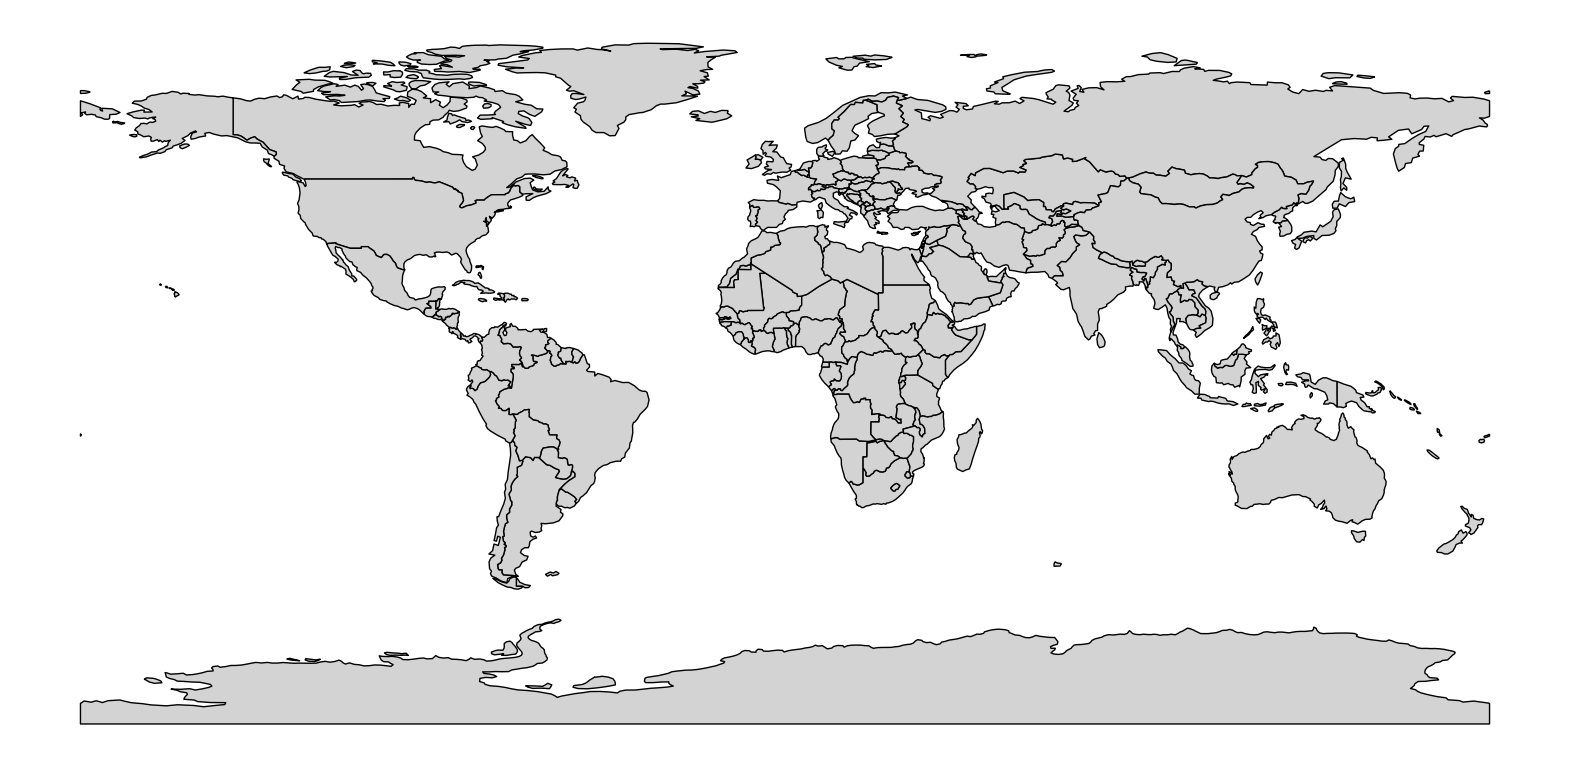

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pycountry

# Data preparation
geo_temp = df

# Function to get alpha-3 country codes
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code = pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

# Create a column for country codes
geo_temp['CODE'] = alpha3code(geo_temp['Country name'])

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Plotting
fig, ax = plt.subplots(figsize=(20, 15))
ax.axis('off')

# Plot world map
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot Ladder score for each country
merge.plot(column='Ladder score', ax=ax, legend=True,
           legend_kwds={'label': "Ladder Score", 'orientation': "horizontal"},
           cmap='viridis')

# Title and Text
ax.text(-175, 112, 'Happiness Levels Across the World', fontsize=30, fontweight='bold', fontfamily='sans-serif', color='#323232')
ax.text(-175, 102, 'Visualization of Ladder Score by Country', color='gray', fontfamily='monospace', fontsize=20)

plt.show()


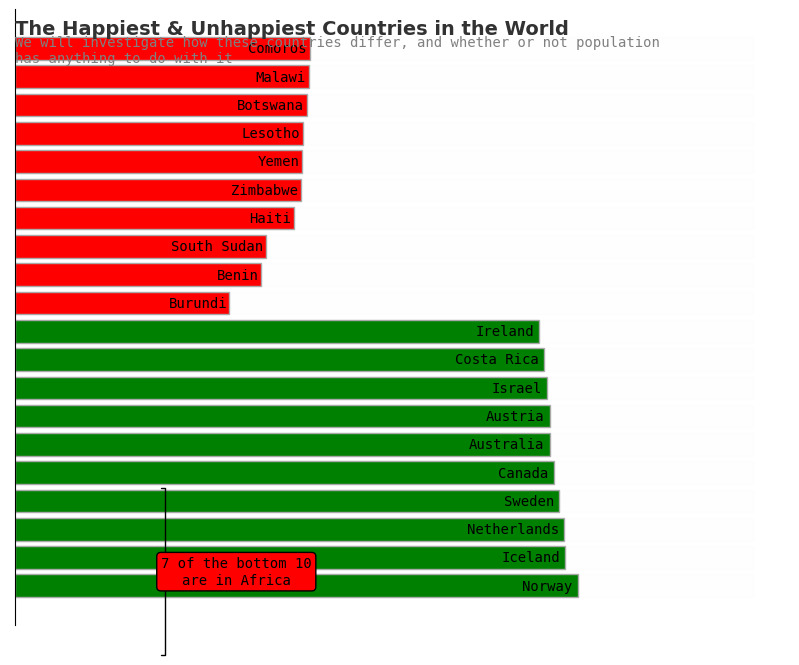

In [29]:
mean_ladder_score = df.groupby('Country name')['Ladder score'].mean()

happiest_countries = mean_ladder_score.nlargest(10)
unhappiest_countries = mean_ladder_score.nsmallest(10)

top_bottom = pd.concat([happiest_countries, unhappiest_countries])
fig = plt.figure(figsize=(10, 8), dpi=100)

ax0 = fig.add_subplot(1, 1, 1)

data = top_bottom
color_map = ['#e7e9e7' for _ in range(20)]
color_map[:10] = ['green'] * 10
color_map[10:] = ['red'] * 10

ax0.barh(data.index, 10, edgecolor='darkgray', color='lightgray', alpha=0.01)
ax0.barh(data.index, data, edgecolor='darkgray', color=color_map)

for i, (country, score) in enumerate(data.items()):
    ax0.annotate(country, xy=(score - (score * 0.01), i), va='center', ha='right', fontweight='light', fontfamily='monospace', fontsize=10, color='black')

ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])

for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)

ax0.text(0, 19.5, 'The Happiest & Unhappiest Countries in the World', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')
ax0.text(0, 18.5, 'We will investigate how these countries differ, and whether or not population\nhas anything to do with it', fontfamily='monospace', fontsize=10, fontweight='light', color='gray')

ax0.annotate('7 of the bottom 10\nare in Africa', xy=(2, 0.5), xytext=(3, 0.5), xycoords='data',
            fontsize=10, ha='center', va='center', fontfamily='monospace',
            bbox=dict(boxstyle='round', fc='red'),
            arrowprops=dict(arrowstyle='-[, widthB=6, lengthB=0.3', lw=1, color='black'), color='black')

plt.show()


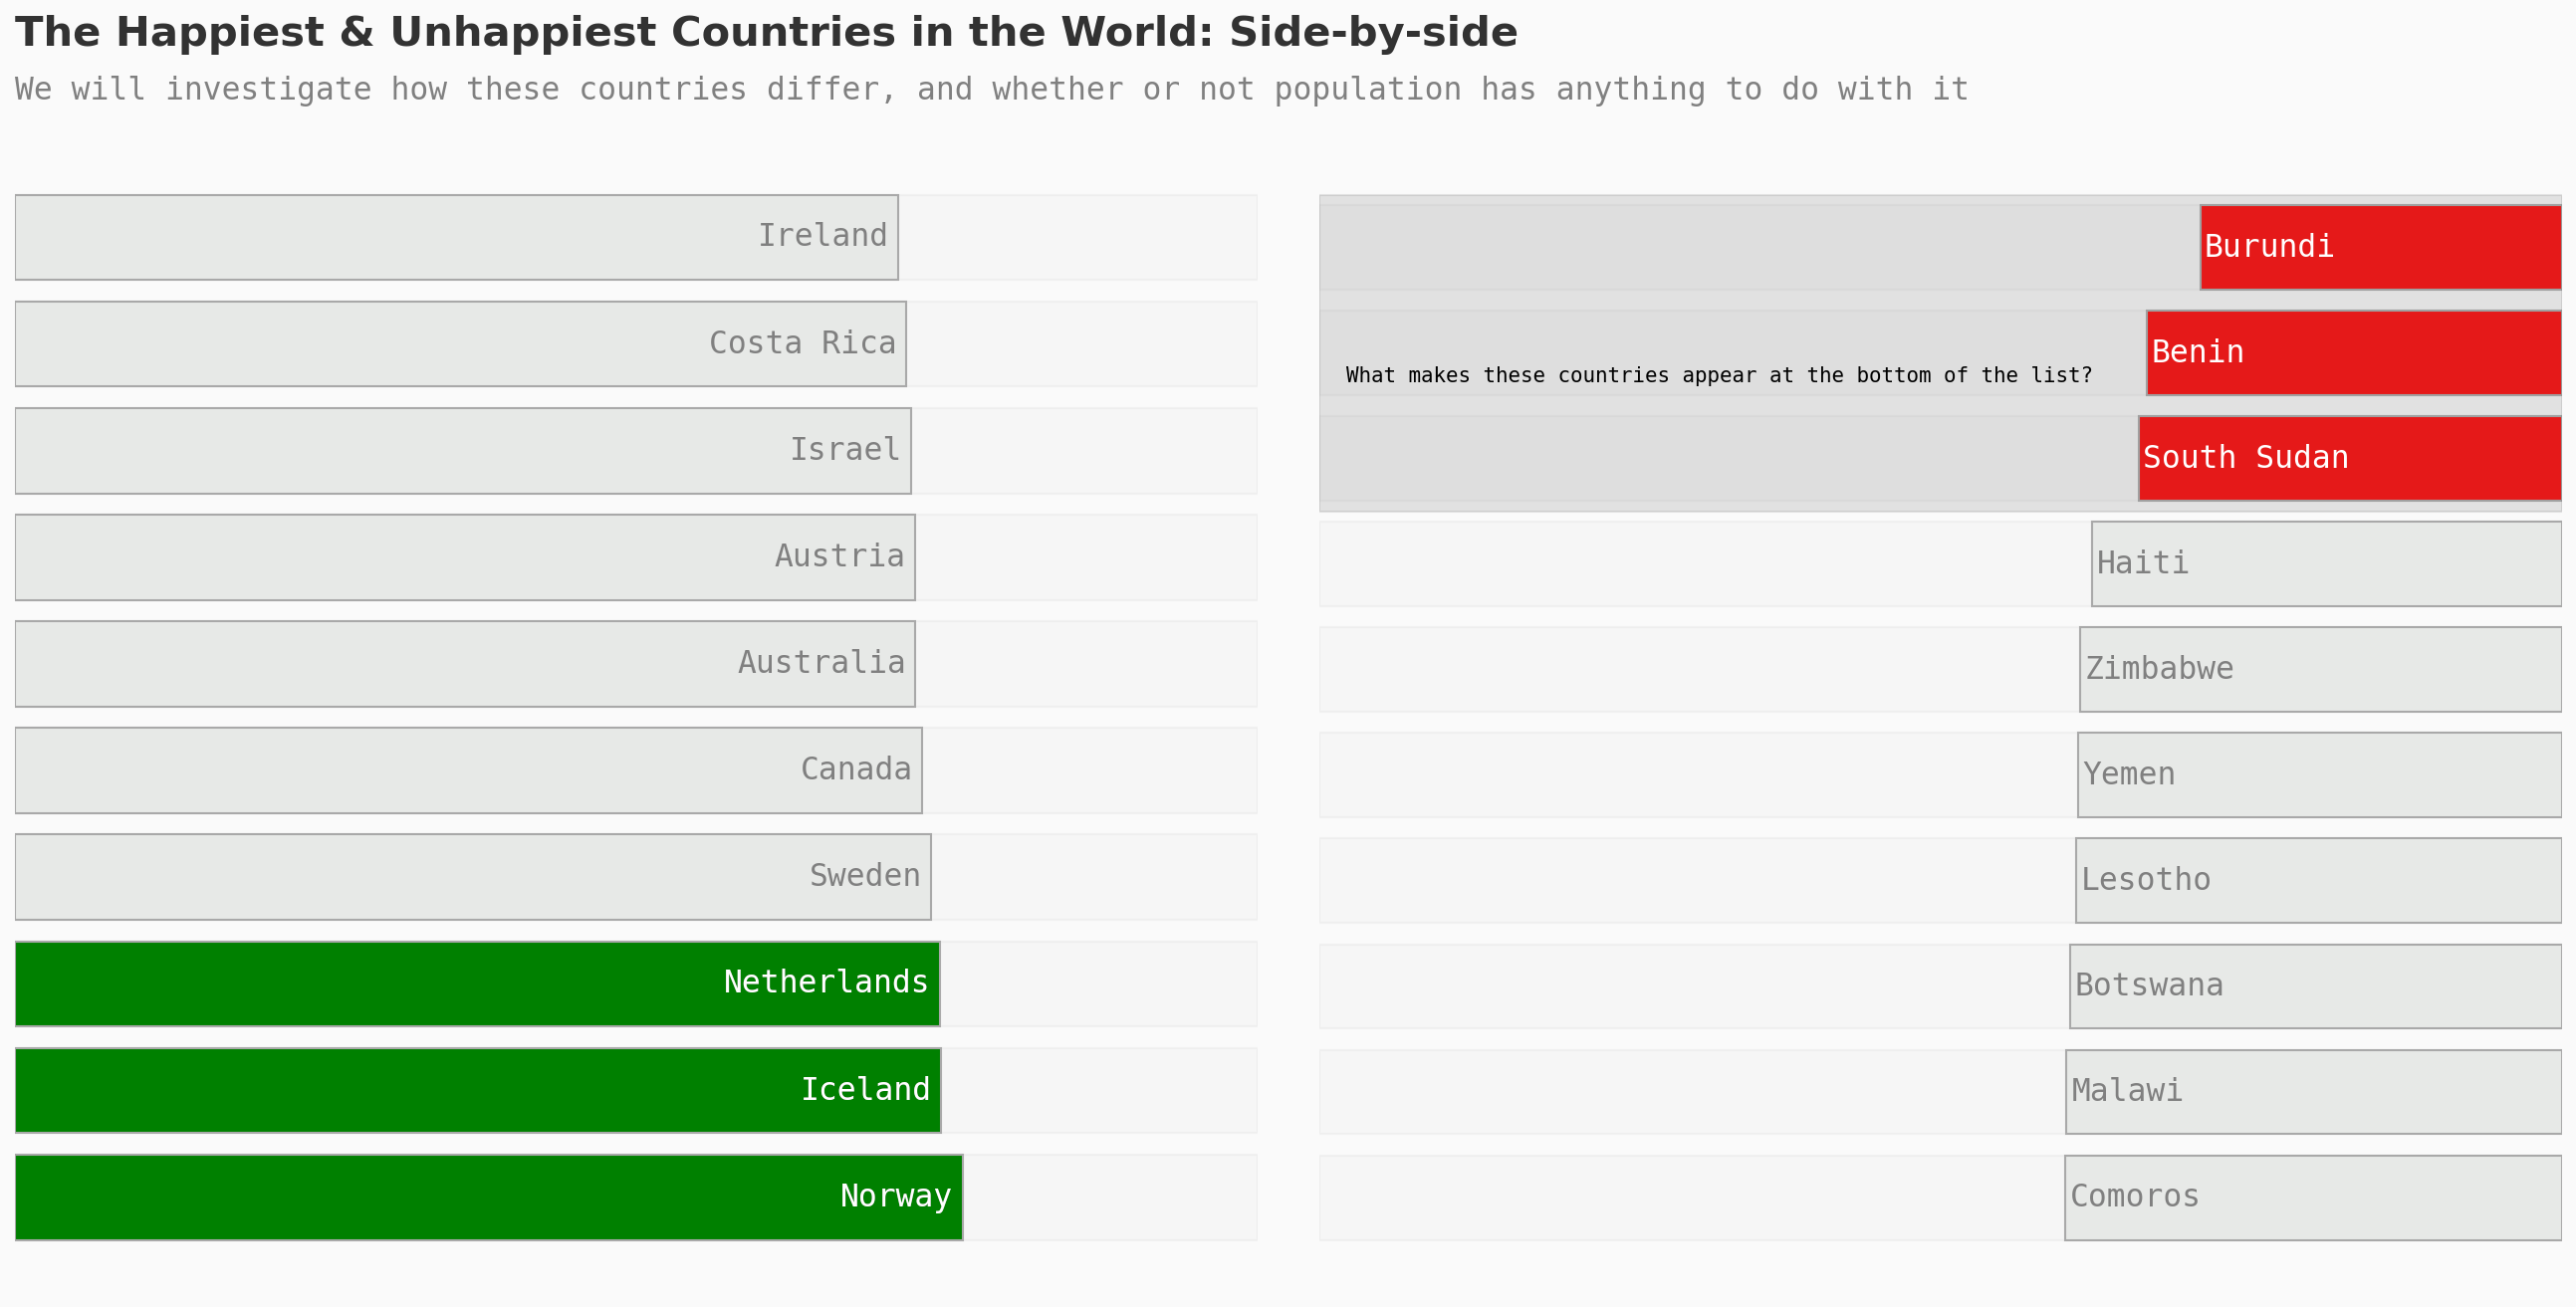

In [30]:
mean_ladder_score = df.groupby('Country name')['Ladder score'].mean()

happiest_countries = mean_ladder_score.nlargest(10)
unhappiest_countries = mean_ladder_score.nsmallest(10)

fig = plt.figure(figsize=(22, 10), dpi=150)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

background_color = "#fafafa"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)


data = df.groupby('Country name')['Ladder score'].mean().sort_values(ascending=False)[:10]
color_map = ['#e7e9e7' for _ in range(10)]
color_map[:3] = ['green'] * 3  # Color highlight


ax0.barh(data.index, 10, edgecolor='darkgray', color='lightgray', alpha=0.1)
ax0.barh(data.index, data, edgecolor='darkgray', color=color_map)

for i in range(0, 10):
    ax0.annotate(list(data.index)[i],
                   xy=(data[i] - (data[i] * 0.01), i),
                   va='center', ha='right', fontweight='light', fontfamily='monospace', fontsize=15, color='gray', rotation=0)
for i in range(0, 3):
    ax0.annotate(list(data.index)[i],
                   xy=(data[i] - (data[i] * 0.01), i),
                   va='center', ha='right', fontweight='light', fontfamily='monospace', fontsize=15, color='white', rotation=0)

data = df.groupby('Country name')['Ladder score'].mean().sort_values(ascending=True)[:10]

color_map = ['#e7e9e7' for _ in range(10)]
color_map[:3] = ['red'] * 3


ax1.barh(data.index[::-1], 10, edgecolor='darkgray', color='lightgray', alpha=0.1)
ax1.barh(data.index, data, edgecolor='darkgray', color=color_map)

for i in range(7, 10):
    ax1.annotate(list(data.index)[::-1][i],
                   xy=(data[::-1][i] - (data[::-1][i] * 0.01), i),
                   va='center', ha='left', fontweight='light', fontfamily='monospace', fontsize=15, color='white', rotation=0)
for i in range(0, 7):
    ax1.annotate(list(data.index)[::-1][i],
                   xy=(data[::-1][i] - (data[::-1][i] * 0.01), i),
                   va='center', ha='left', fontweight='light', fontfamily='monospace', fontsize=15, color='gray', rotation=0)

for s in ['top', 'bottom', 'right', 'left']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

ax0.set_xlim(0, 10)
ax1.set_xlim(10, 0)

ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])
ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])

ax0.text(0, 10.8, 'The Happiest & Unhappiest Countries in the World: Side-by-side', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
ax0.text(0, 10.3, 'We will investigate how these countries differ, and whether or not population has anything to do with it', fontfamily='monospace', fontsize=15, fontweight='light', color='gray')
from matplotlib.patches import Rectangle

ax1.add_patch(Rectangle((0, 6.5), 10, 3, alpha=0.2, edgecolor='gray', facecolor='gray'))
fig.text(0.53, 0.72, 'What makes these countries appear at the bottom of the list?', color='black', fontfamily='monospace', fontsize=10)

plt.show()


Upon initial inspection, it's evident that a significant portion of the world's most content nations are located within Europe.

Furthermore, it's notable that the nations from Europe occupying the top 10 positions predominantly hail from the Northern region of the continent.

I'll delve deeper into temporal shifts later on, but for now, let's focus on examining the top 20 countries across different years.

This visual representation displays the scores of all countries over the years, with a specific emphasis on their 2021 scores.

It's noteworthy that despite the challenges posed by the pandemic, the 2021 scores of many countries surpass their respective averages.

While there are fluctuations in the scores, they generally maintain a commendably high level.

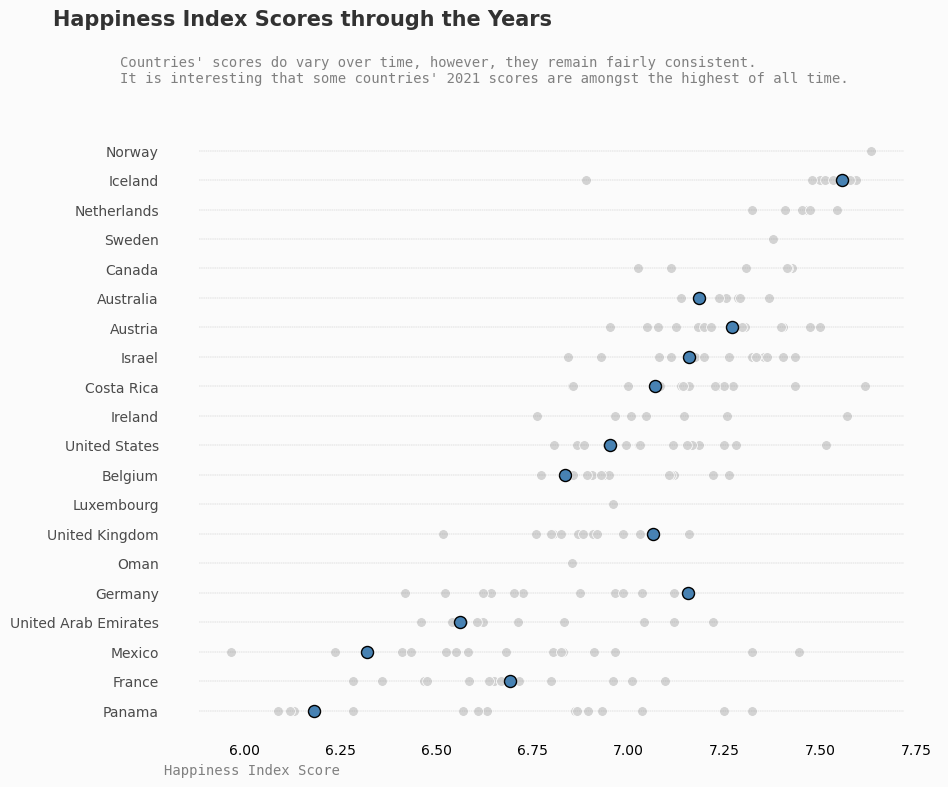

In [31]:
background = "#fbfbfb"
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=100)
fig.patch.set_facecolor(background)
ax.set_facecolor(background)

top_20_countries = df.groupby('Country name')['Ladder score'].mean().nlargest(20).index[::-1]

plot = 1
for country in top_20_countries:

    sns.scatterplot(data=df[df['Country name'] == country], y=[plot] * len(df[df['Country name'] == country]), x='Ladder score', color='lightgray', s=50, ax=ax)
    sns.scatterplot(data=df[(df['Country name'] == country) & (df['year'] == 2021)], y=[plot] * len(df[(df['Country name'] == country) & (df['year'] == 2021)]), x='Ladder score', color='steelblue', ec='black', linewidth=1, s=75, ax=ax)
    plot += 1

ax.set_yticks(range(1, len(top_20_countries) + 1))
ax.set_yticklabels(top_20_countries, fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set_xlabel("Happiness Index Score", fontfamily='monospace', loc='left', color='gray')

for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.hlines(y=range(1, len(top_20_countries) + 1), xmin=Xstart, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)
ax.text(5.5, Yend + 3.3, 'Happiness Index Scores through the Years', fontsize=15, fontweight='bold', fontfamily='sans-serif', color='#323232')
ax.text(5.5, Yend + 0.8,
        '''
        Countries' scores do vary over time, however, they remain fairly consistent.
        It is interesting that some countries' 2021 scores are amongst the highest of all time.
        ''', fontsize=10, fontweight='light', fontfamily='monospace', color='gray')

plt.annotate('2021\nscore', xy=(7.842, 19), xytext=(8.2, 11),
             arrowprops=dict(facecolor='steelblue', arrowstyle="->", connectionstyle="arc3,rad=.3"), fontsize=10,
             fontfamily='monospace', ha='center', color='steelblue')

plt.show()


It's clear by now that Northern European countries consistently lead the rankings, a trend that has persisted over time.

Let's take a closer look at these distinctions between Europe and other regions to gain a deeper understanding.
We will fucus on the effect of po[ulation in that

Let's introduce additional variables, like population size.

Does population size influence levels of happiness?

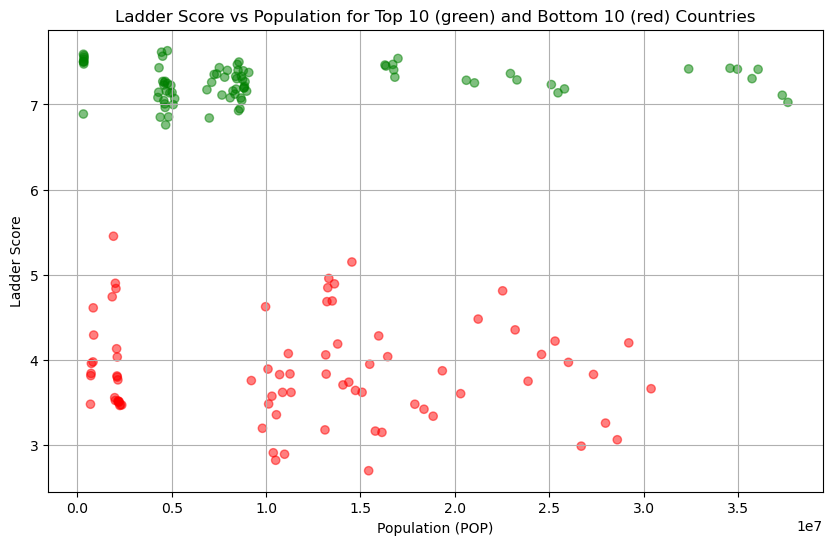

In [32]:
mean_ladder_score = df.groupby('Country name')['Ladder score'].mean()

top_10_countries = mean_ladder_score.nlargest(10).index
bottom_10_countries = mean_ladder_score.nsmallest(10).index
top_bottom_df = df[df['Country name'].isin(top_10_countries) | df['Country name'].isin(bottom_10_countries)]

plt.figure(figsize=(10, 6))
colors = ['green' if country in top_10_countries else 'red' for country in top_bottom_df['Country name']]
plt.scatter(top_bottom_df['POP'], top_bottom_df['Ladder score'], color=colors, alpha=0.5)
plt.xlabel('Population (POP)')
plt.ylabel('Ladder Score')
plt.title('Ladder Score vs Population for Top 10 (green) and Bottom 10 (red) Countries')
plt.grid(True)
plt.show()


Visualization for level of Happiness against other factors ('Logged GDP per capita', 'Social support', and 'Healthy life expectancy") to show Impact of Economic and Social Factors on Global Happiness Levels

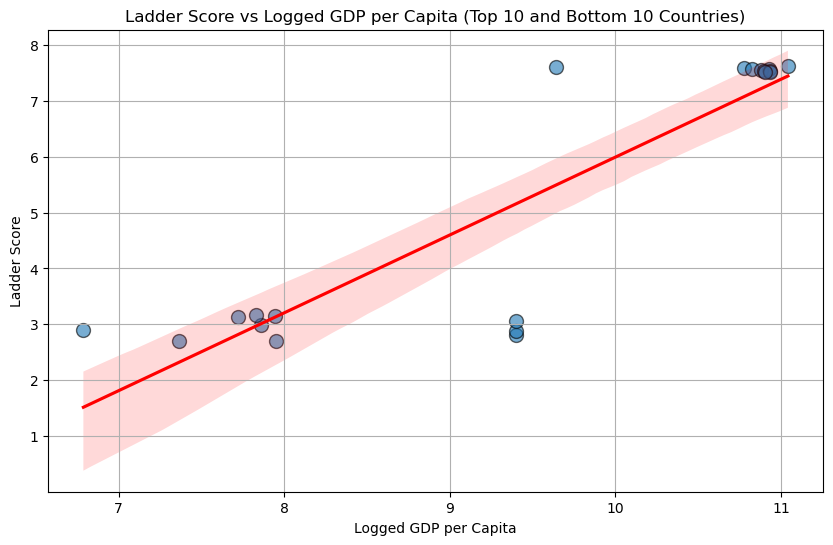

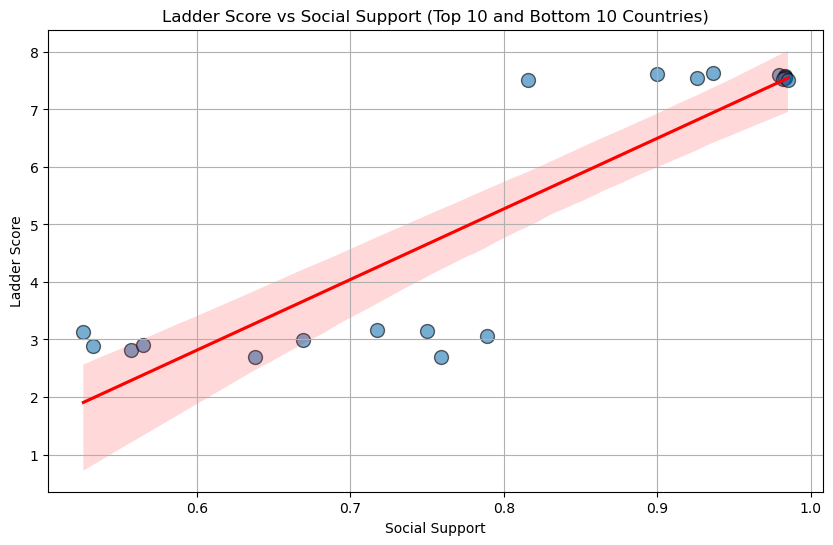

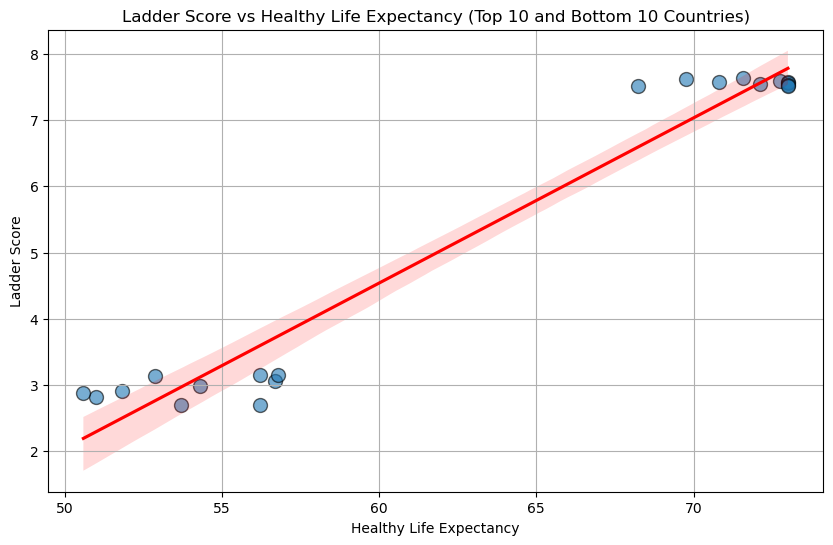

In [33]:
top_10_countries = df.nlargest(10, 'Ladder score')
bottom_10_countries = df.nsmallest(10, 'Ladder score')
top_bottom_20_countries = pd.concat([top_10_countries, bottom_10_countries])

plt.figure(figsize=(10, 6))
sns.regplot(data=top_bottom_20_countries, x='Logged GDP per capita', y='Ladder score', scatter_kws={'s': 100, 'alpha': 0.6, 'edgecolor': 'k'}, line_kws={'color': 'red'})
plt.title('Ladder Score vs Logged GDP per Capita (Top 10 and Bottom 10 Countries)')
plt.xlabel('Logged GDP per Capita')
plt.ylabel('Ladder Score')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.regplot(data=top_bottom_20_countries, x='Social support', y='Ladder score', scatter_kws={'s': 100, 'alpha': 0.6, 'edgecolor': 'k'}, line_kws={'color': 'red'})
plt.title('Ladder Score vs Social Support (Top 10 and Bottom 10 Countries)')
plt.xlabel('Social Support')
plt.ylabel('Ladder Score')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=top_bottom_20_countries, x='Healthy life expectancy', y='Ladder score', scatter_kws={'s': 100, 'alpha': 0.6, 'edgecolor': 'k'}, line_kws={'color': 'red'})
plt.title('Ladder Score vs Healthy Life Expectancy (Top 10 and Bottom 10 Countries)')
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Ladder Score')
plt.grid(True)
plt.show()


We see clearly that happier countries tend to be older, and less populous.

I've included Europe for reference.



A global view

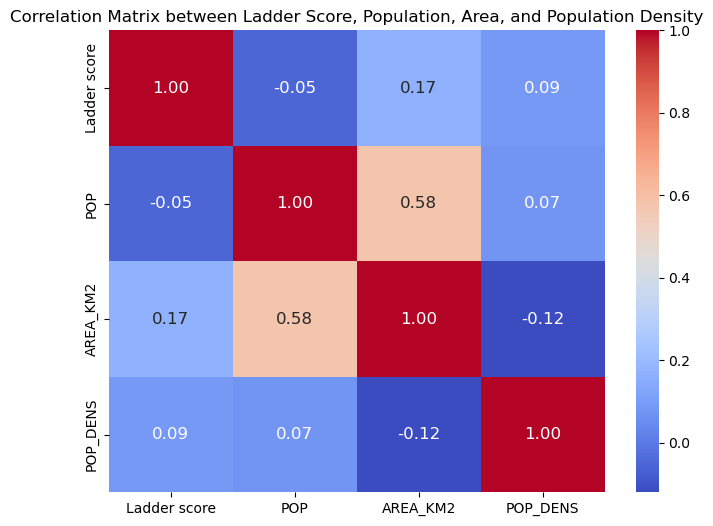

Correlation between Ladder Score, Population, Area, and Population Density:
              Ladder score       POP  AREA_KM2  POP_DENS
Ladder score      1.000000 -0.051089  0.167395  0.090012
POP              -0.051089  1.000000  0.577218  0.073486
AREA_KM2          0.167395  0.577218  1.000000 -0.119562
POP_DENS          0.090012  0.073486 -0.119562  1.000000


In [35]:
correlation = df[['Ladder score', 'POP', 'AREA_KM2', 'POP_DENS']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix between Ladder Score, Population, Area, and Population Density')
plt.show()

print("Correlation between Ladder Score, Population, Area, and Population Density:")
print(correlation)


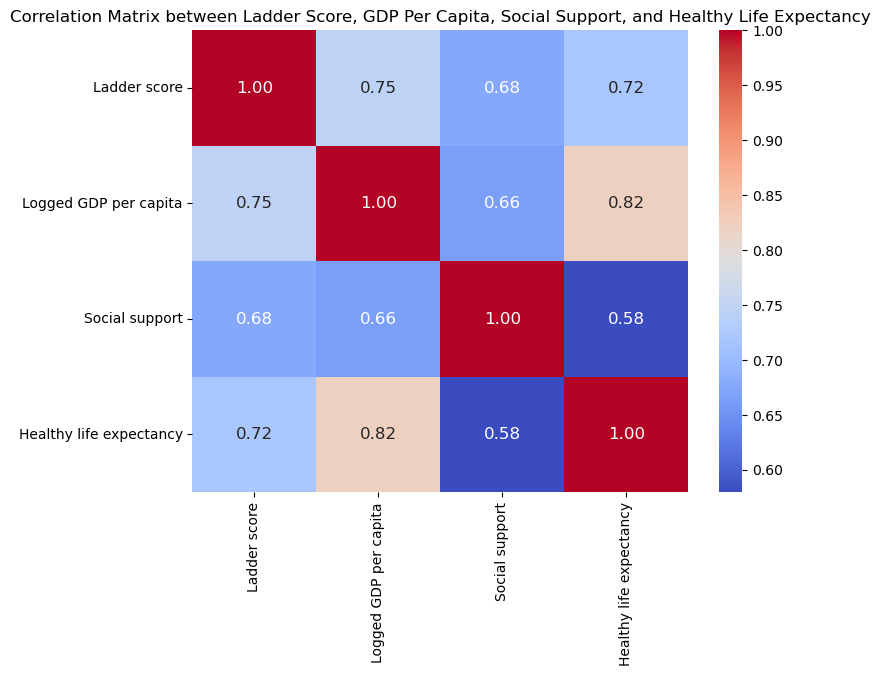

Correlation between Ladder Score, GDP Per Capita, Social Support, and Healthy Life Expectancy:
                         Ladder score  Logged GDP per capita  Social support  \
Ladder score                 1.000000               0.745249        0.676271   
Logged GDP per capita        0.745249               1.000000        0.663925   
Social support               0.676271               0.663925        1.000000   
Healthy life expectancy      0.717914               0.821913        0.579659   

                         Healthy life expectancy  
Ladder score                            0.717914  
Logged GDP per capita                   0.821913  
Social support                          0.579659  
Healthy life expectancy                 1.000000  


In [36]:
correlation = df[['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix between Ladder Score, GDP Per Capita, Social Support, and Healthy Life Expectancy')
plt.show()

print("Correlation between Ladder Score, GDP Per Capita, Social Support, and Healthy Life Expectancy:")
print(correlation)


The correlation matrix reveals several key insights:

- Economic prosperity, as indicated by GDP per capita, is strongly associated with higher happiness scores. Wealthier countries generally report higher levels of happiness.
- Social support is a significant factor contributing to happiness. Countries with robust social support networks are happier.
- Health is a crucial determinant of happiness. Countries where people live longer, healthier lives are generally happier.
- GDP per capita not only correlates strongly with happiness but also with other important factors like social support and healthy life expectancy, suggesting that economic development positively influences these areas.

In summary, the matrix indicates that economic factors (GDP per capita), social support systems, and health (healthy life expectancy) are all interrelated and collectively contribute to the happiness of a nation. Efforts to improve these areas can lead to higher overall happiness scores.
